## **Lab Assignment No. 4- NLP Preprocessing And Text Classification**

## Name: Dhiraj Rathod

## PRN: 202201040139

## Batch: T3

## Group Members: Sanket Mane.

Objective The objective of this assignment is to implement NLP preprocessing techniques and
build a text classification model using machine learning techniques.
Dataset : https://www.kaggle.com/datasets/parulpandey/emotion-dataset?resource=download

**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

Step 1: Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

📁 Step 2: Load the Dataset

In [2]:
# Load training, validation, and test datasets
train_df = pd.read_csv('/content/validation.csv')
val_df = pd.read_csv('/content/validation.csv')
test_df = pd.read_csv('/content/test.csv')

# Combine datasets for preprocessing
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Display first few rows
df.head()


,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


🔍 Step 3: Explore the Data

In [3]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nLabel Distribution:\n", df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6000 non-null   object
 1   label   6000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.9+ KB
None

Missing values:
 text     0
label    0
dtype: int64

Label Distribution:
 label
1    2103
0    1681
3     825
4     648
2     515
5     228
Name: count, dtype: int64


 Step 4: Text Preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to download the missing data.
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [t for t in tokens if t.isalpha()]  # Remove punctuation/numbers
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    stemmed = [stemmer.stem(t) for t in tokens]  # Stemming
    lemmatized = [lemmatizer.lemmatize(t) for t in stemmed]  # Lemmatization
    return ' '.join(lemmatized)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess)
df[['text', 'clean_text']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,clean_text
0,im feeling quite sad and sorry for myself but ...,im feel quit sad sorri ill snap soon
1,i feel like i am still looking at a blank canv...,feel like still look blank canva blank piec paper
2,i feel like a faithful servant,feel like faith servant
3,i am just feeling cranky and blue,feel cranki blue
4,i can have for a treat or if i am feeling festive,treat feel festiv


Step 5: Vectorization (TF-IDF and CountVectorizer)

In [6]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Count Vectorizer
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(df['clean_text'])

# Label encoding
y = df['label']


 Step 6: Split the Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Step 7: Model Training:-
Option A: Logistic Regression

In [8]:
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Option B: Naive Bayes

In [9]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)


MultinomialNB()

 Step 8: Model Evaluation

Accuracy: 0.8108333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       324
           1       0.73      0.98      0.84       415
           2       0.88      0.54      0.67        96
           3       0.94      0.68      0.79       178
           4       0.97      0.60      0.74       146
           5       0.88      0.34      0.49        41

    accuracy                           0.81      1200
   macro avg       0.87      0.67      0.73      1200
weighted avg       0.84      0.81      0.80      1200



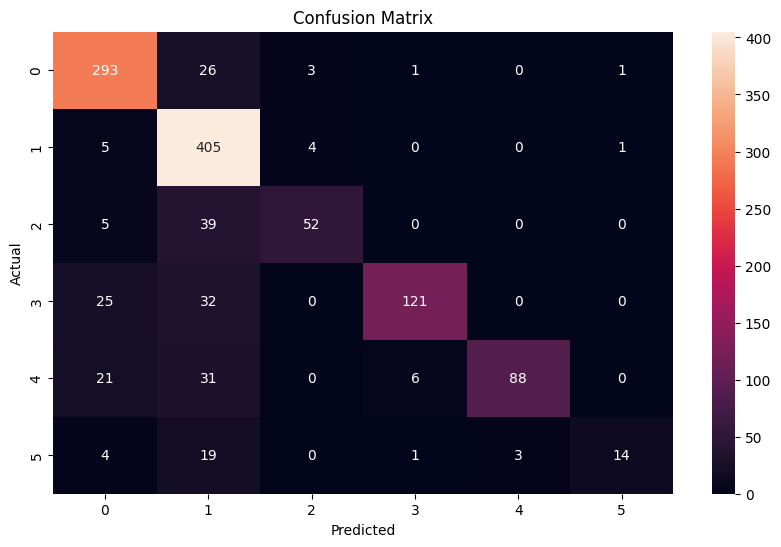

In [10]:
# Predict and evaluate
y_pred = model_lr.predict(X_test)  # or model_nb

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
y_pred = model_lr.predict(X_test)


Prediction on Custom Text

In [16]:
# Example input sentence
new_text = ["i cant walk into a shop anywhere where i do not feel uncomfortable"]

# Preprocess the input using the same preprocessing function
new_text_clean = [preprocess(t) for t in new_text]

# Vectorize using the same TF-IDF vectorizer
new_text_vec = tfidf.transform(new_text_clean)

# Predict using the trained model (you can use model_lr or model_nb)
predicted_label = model_lr.predict(new_text_vec)

# Output the result
print("Predicted Emotion:", predicted_label[0])


Predicted Emotion: 4


 Label Distribution (Bar Chart)

<ipython-input-17-c8add756924d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


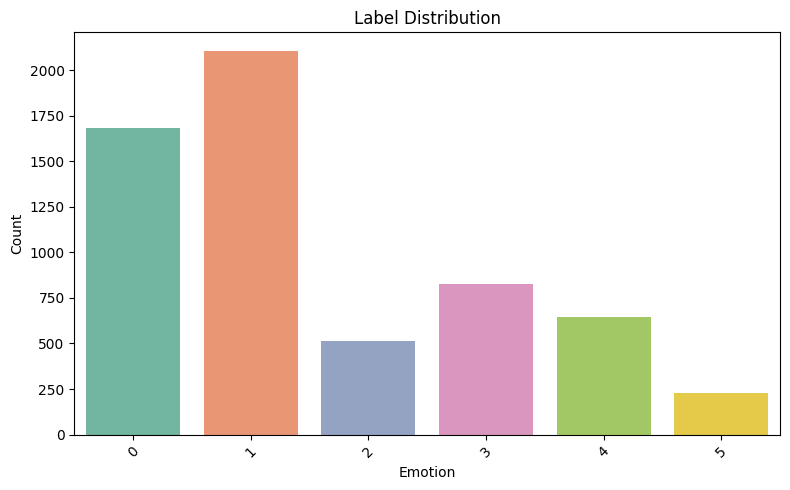

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Label Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Before vs After Preprocessing (Sample Comparison)

In [18]:
sample_df = df[['text', 'clean_text']].sample(5, random_state=1)
print(sample_df.to_string(index=False))


                                                                                                                                               text                                                                       clean_text
i have often observed that at times when it seems i should feel something im surprised by how disconnected i feel to the people and world around me often observ time seem feel someth im surpris disconnect feel peopl world around
           i have a feeling often and often that its dangerous to wait for things that if you wait for things they only go further and further away                            feel often often danger wait thing wait thing go away
                               i feel our culture and artistic history is slowly slipping away except in the small groups that try to keep it alive     feel cultur artist histori slowli slip away except small group tri keep aliv
                                                            i am so sorry for you to

Top Words Per Emotion (Bar Plot per label)

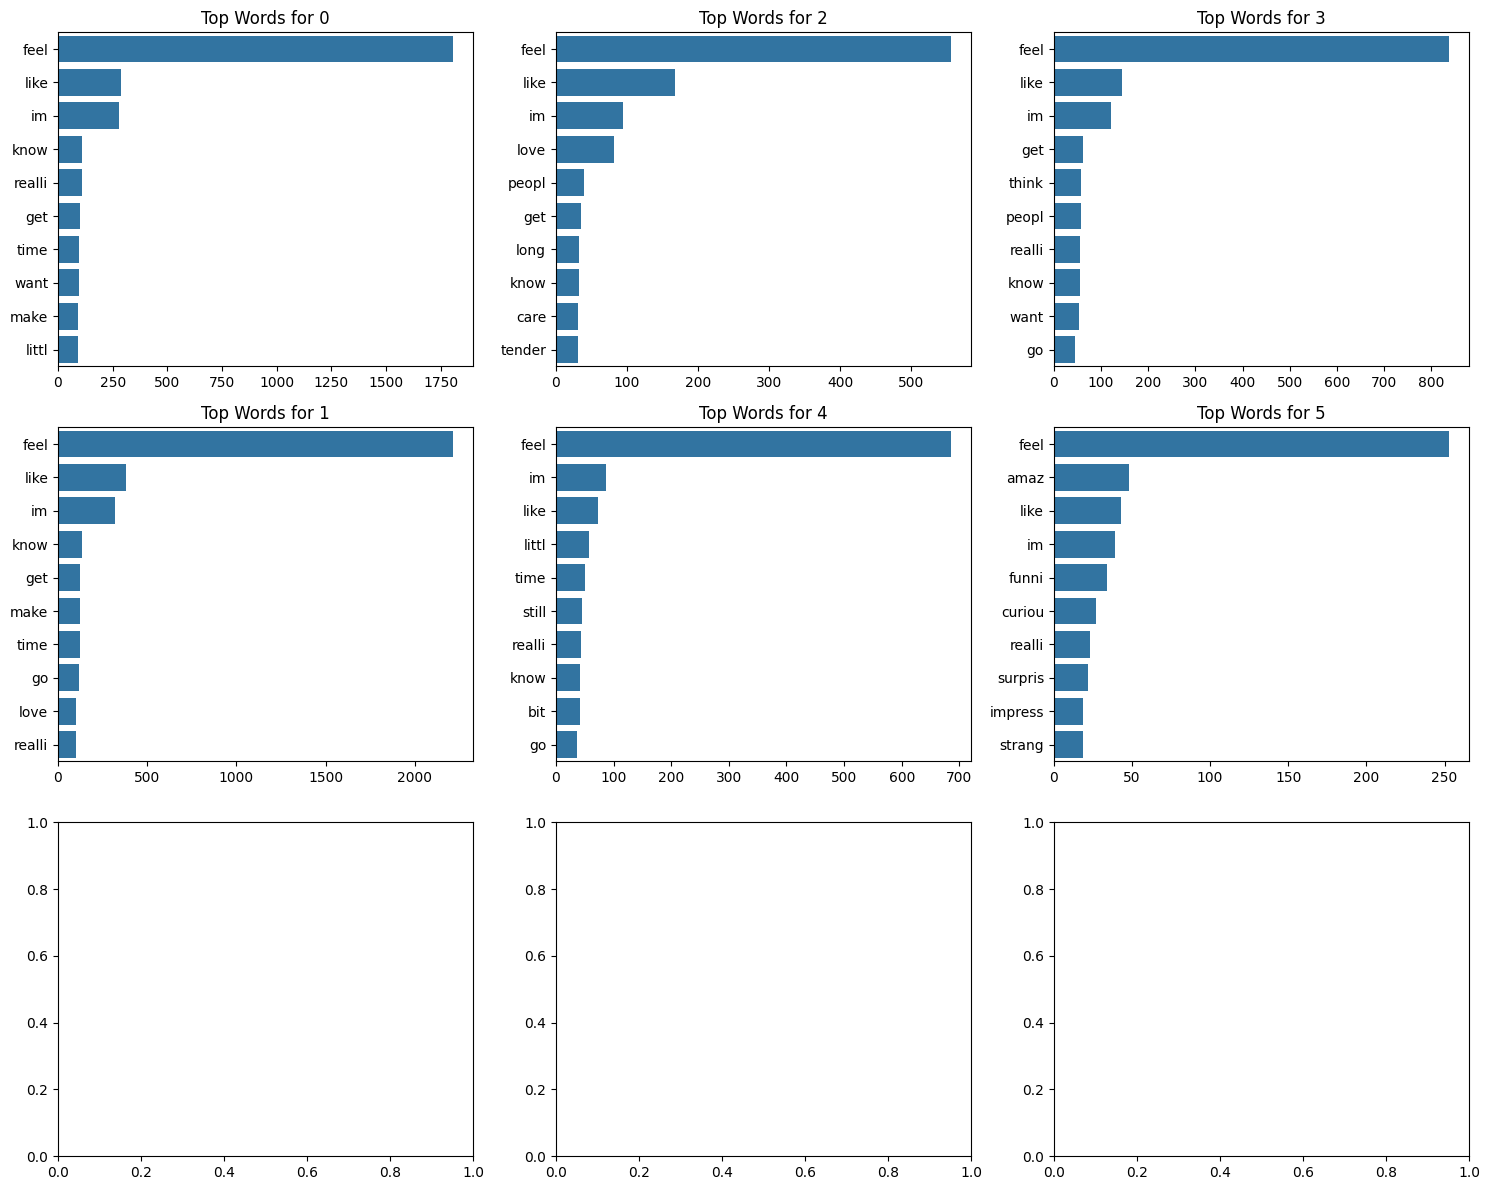

In [19]:
from collections import Counter

top_words = {}
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['clean_text'])
    words = text.split()
    common = Counter(words).most_common(10)
    top_words[label] = dict(common)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, (label, word_freqs) in enumerate(top_words.items()):
    sns.barplot(x=list(word_freqs.values()), y=list(word_freqs.keys()), ax=axes[i])
    axes[i].set_title(f"Top Words for {label}")

plt.tight_layout()
plt.show()


TF-IDF Vector Analysis (Sparsity)

In [20]:
sparsity = (X_tfidf != 0).sum() / np.prod(X_tfidf.shape)
print(f"Sparsity of TF-IDF matrix: {sparsity:.4f}")


Sparsity of TF-IDF matrix: 0.0017


 Model Evaluation Metrics (Bar Chart)

<ipython-input-21-ad76a742c761>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='magma')


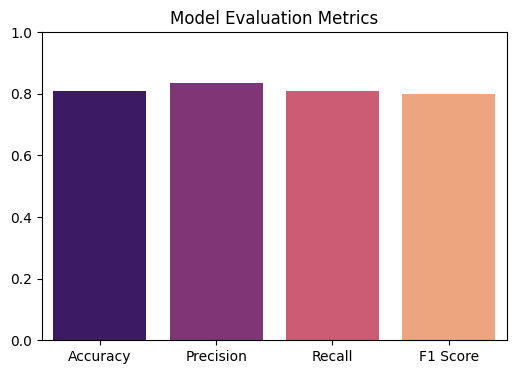

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred, average='weighted')
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='magma')
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.show()


Text(0.5, 1.0, 'Normalized Confusion Matrix')

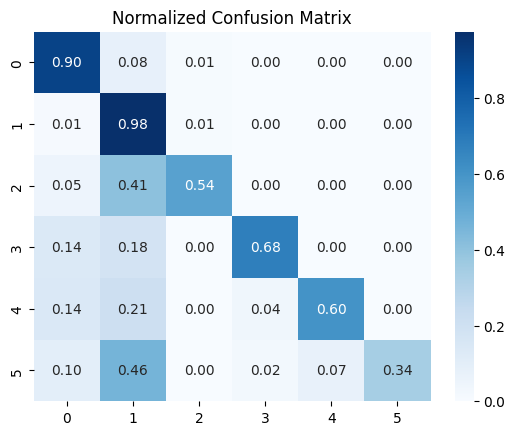

In [22]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2f', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_, cmap="Blues")
plt.title("Normalized Confusion Matrix")


**Declaration**

I, Dhiraj Rathod, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/dhirajrr/-NLP-Preprocessing-And-Text-Classification.git

Signature: Dhiraj Rathod